In [1]:
import pandas as pd

In [33]:
df = pd.read_excel('ICM_FinalProject_Part_1/ICM_FinalProject_Part_1/BIOCARD_ICM_random200.xlsx').replace("'", "", regex=True)
df.head()
#df.applymap(lambda x: x.replace("'", "") if (isinstance(x, str)) else x)

,'Subject_ID','Gender','Age','Diagnosis','ACR_R','AGWM_R','AG_R','ALIC_R','Amyg_R','AnteriorBasalForebrain_R',...,'TempSul_L','Thalamus_L','dorsalWM_ACC_L','dorsal_ACC_L','rostralWM_ACC_L','rostral_ACC_L','subcallosalWM_ACC_L','subcallosal_ACC_L','subgenualWM_ACC_L','subgenual_ACC_L'
0,Subject_1,F,56.8,NORMAL,14270,3694,12859,2294,2310,338,...,1175,6638,1523,13052,4,2403,104,475,225,1700
1,Subject_2,F,53.2,NORMAL,12964,3275,12063,2367,1697,243,...,858,5100,1419,10957,108,2127,18,282,160,1410
2,Subject_3,F,81.0,NORMAL,9742,3386,10980,1586,1400,175,...,1437,4546,795,9783,39,1829,0,262,73,1482
3,Subject_4,M,69.6,NORMAL,10960,3709,12992,2301,2150,301,...,1350,5400,1829,11468,34,1866,71,338,164,1772
4,Subject_5,M,55.3,NORMAL,13137,2757,13342,2275,2166,278,...,1713,5770,1421,11365,20,2184,74,491,162,1887


In [45]:
{df.columns.get_loc(c) : c for i, c in enumerate(df.columns)}

{0: "'Subject_ID'",
 1: "'Gender'",
 2: "'Age'",
 3: "'Diagnosis'",
 4: "'ACR_R'",
 5: "'AGWM_R'",
 6: "'AG_R'",
 7: "'ALIC_R'",
 8: "'Amyg_R'",
 9: "'AnteriorBasalForebrain_R'",
 10: "'BCC_R'",
 11: "'CGC_R'",
 12: "'CGH_R'",
 13: "'CP_R'",
 14: "'CST_R'",
 15: "'Caud_R'",
 16: "'Caudate_tail_R'",
 17: "'CentralSul_R'",
 18: "'CerebellumGM_R'",
 19: "'CerebellumWM_R'",
 20: "'Chroid_LVetc_R'",
 21: "'CinguSul_R'",
 22: "'Cl_R'",
 23: "'CuWM_R'",
 24: "'Cu_R'",
 25: "'ECCL_R'",
 26: "'EC_R'",
 27: "'ENT_R'",
 28: "'Fimbria_R'",
 29: "'FrontSul_R'",
 30: "'FuG_R'",
 31: "'FuWM_R'",
 32: "'Fx/ST_R'",
 33: "'Fx_R'",
 34: "'GCC_R'",
 35: "'GP_R'",
 36: "'Hippo_R'",
 37: "'HypoThalamus_R'",
 38: "'ICP_R'",
 39: "'ICP_cb_R'",
 40: "'IFG_opercularis_R'",
 41: "'IFG_orbitalis_R'",
 42: "'IFG_triangularis_R'",
 43: "'IFO_R'",
 44: "'IFWM_opercularis_R'",
 45: "'IFWM_orbitalis_R'",
 46: "'IFWM_triangularis_R'",
 47: "'IOG_R'",
 48: "'IOWM_R'",
 49: "'ITG_R'",
 50: "'ITWM_R'",
 51: "'Insula_R'",


In [63]:
columns_filter = [
    "'Diagnosis'", 
    "'Amyg_L'", 
    "'Amyg_R'", 
    "'Fimbria_L'", 
    "'Fimbria_R'", 
    "'Hippo_L'", 
    "'Hippo_R'", 
    "'Mammillary_L'", 
    "'Mammillary_R'"
]
BIOCARD = pd.DataFrame(df, columns=columns_filter)
BIOCARD

,'Diagnosis','Amyg_L','Amyg_R','Fimbria_L','Fimbria_R','Hippo_L','Hippo_R','Mammillary_L','Mammillary_R'
0,NORMAL,1934,2310,11,8,4003,3980,87,92
1,NORMAL,1590,1697,2,30,3358,3418,88,74
2,NORMAL,1213,1400,0,4,3038,3149,95,94
3,NORMAL,1772,2150,0,13,3302,3521,109,76
4,NORMAL,1802,2166,15,36,3560,3590,134,97
...,...,...,...,...,...,...,...,...,...
195,NORMAL,1714,1859,9,34,3783,3767,73,81
196,NORMAL,2120,2120,20,22,4374,3975,83,64
197,NORMAL,1586,2229,4,27,3709,3931,81,85
198,NORMAL,1841,2228,4,2,3782,3632,111,111


In [67]:
#filter non normal values
NORMAL = BIOCARD.loc[BIOCARD["\'Diagnosis\'"] == BIOCARD["\'Diagnosis\'"][0]]
mu = NORMAL.mean()
sigma = NORMAL.std()

/tmp/ipykernel_680138/487326185.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mu = NORMAL.mean()
/tmp/ipykernel_680138/487326185.py:4: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  sigma = NORMAL.std()


In [76]:
zscores = (BIOCARD - mu) / NORMAL.std(ddof=0)
zscores = zscores.loc[:, zscores.columns != "\'Diagnosis\'"]
zscores

/tmp/ipykernel_680138/1163966211.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  zscores = (BIOCARD - mu) / NORMAL.std(ddof=0)


,'Amyg_L','Amyg_R','Fimbria_L','Fimbria_R','Hippo_L','Hippo_R','Mammillary_L','Mammillary_R'
0,1.335444,1.648567,0.129265,-1.194473,1.300113,1.207389,-0.256069,0.860736
1,-0.379938,-0.852183,-1.014730,1.020421,-0.508081,-0.467676,-0.197961,-0.359151
2,-2.259877,-2.063803,-1.268951,-1.597181,-1.405169,-1.269442,0.208794,0.996279
3,0.527619,0.995843,-1.268951,-0.691088,-0.665071,-0.160680,1.022305,-0.223608
4,0.677216,1.061115,0.637707,1.624483,0.058206,0.044978,2.475003,1.199593
...,...,...,...,...,...,...,...,...
195,0.238398,-0.191300,-0.124956,1.423129,0.683365,0.572534,-1.069579,0.115250
196,2.262947,0.873457,1.273259,0.215005,2.340174,1.192486,-0.488500,-1.036865
197,-0.399884,1.318125,-0.760509,0.718390,0.475913,1.061342,-0.604716,0.386336
198,0.871693,1.314046,-0.760509,-1.798535,0.680561,0.170160,1.138521,2.148394


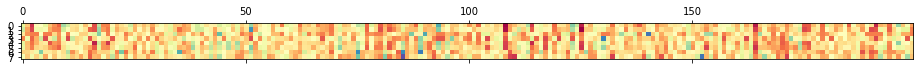

In [79]:
import matplotlib.pyplot as plt
plt.matshow(zscores.T, cmap='Spectral')